In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
n = 100  # número de partículas
m = 1.0  # massa das partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade

# Inicializar posições e velocidades aleatórias para as partículas
np.random.seed(42)  # para reprodutibilidade
positions = np.random.uniform(-2, 2, (n, 2))
positions[:, 1] = np.random.uniform(1, 3, n)  # apenas posições y positivas
velocities = np.random.uniform(-1, 1, (n, 2))
velocities[:, 1] = np.random.uniform(-1, -0.5, n)  # partículas caindo para baixo

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 3)
particles, = ax.plot([], [], 'bo', ms=5)

# Desenhar a cunha com o pico para cima
wedge_x = [-1, 0, 1]
wedge_y = [-1, 1, -1]
ax.fill(wedge_x, wedge_y, 'k')

def init():
    particles.set_data([], [])
    return particles,

def reflect(velocity, normal):
    return velocity - 2 * np.dot(velocity, normal) * normal

def detect_collision(position):
    if position[1] >= 1 or position[1] <= -1:
        return None
    if position[0] < 0 and position[1] > 0 and position[0] > -1 + position[1]:
        normal = np.array([1, -1]) / np.sqrt(2)
    elif position[0] > 0 and position[1] > 0 and position[0] < 1 - position[1]:
        normal = np.array([-1, -1]) / np.sqrt(2)
    elif position[1] < 0 and np.abs(position[0]) < 1:
        normal = np.array([0, 1])
    else:
        return None
    return normal

def update(frame):
    dt = 0.02
    global positions, velocities

    # Atualizar posições
    positions += velocities * dt

    # Adicionar efeito da gravidade
    velocities[:, 1] -= g * dt

    # Detectar colisões entre partículas
    for i in range(n):
        for j in range(i + 1, n):
            if np.linalg.norm(positions[i] - positions[j]) < 0.1:
                # Calcular o vetor unitário ao longo da linha de impacto
                k = (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
                # Calcular a velocidade relativa inicial
                relative_velocity_initial = velocities[i] - velocities[j]
                # Calcular a componente da velocidade relativa na direção do impacto
                relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
                # Calcular a velocidade relativa tangencial (não afetada pela colisão)
                relative_velocity_tangential = relative_velocity_initial - relative_velocity_normal
                # Calcular a velocidade normal final após a colisão
                relative_velocity_normal_final = -e * relative_velocity_normal
                # Calcular a velocidade final das partículas
                velocities[i] += (relative_velocity_normal_final - relative_velocity_normal) / 2
                velocities[j] -= (relative_velocity_normal_final - relative_velocity_normal) / 2

        # Detectar colisões com a cunha
        normal = detect_collision(positions[i])
        if normal is not None:
            velocities[i] = reflect(velocities[i], normal)
            if normal[1] == 1:
                positions[i, 1] = max(positions[i, 1], -1)
            else:
                positions[i, 1] = min(positions[i, 1], 1)

    # Atualizar os dados das partículas para o gráfico
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particulas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=20))

plt.close(fig)

gif_path

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
m = 1.0  # massa das partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
v1_initial = np.array([1.0, 0.0])  # velocidade inicial da partícula 1
v2_initial = np.array([-0.5, 0.0])  # velocidade inicial da partícula 2
c1_initial = np.array([0.0, 0.0])  # posição inicial da partícula 1
c2_initial = np.array([2.0, 0.0])  # posição inicial da partícula 2

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-1, 3)
ax.set_ylim(-1, 1)
particle1, = ax.plot([], [], 'bo', ms=10)
particle2, = ax.plot([], [], 'ro', ms=10)

def init():
    particle1.set_data([], [])
    particle2.set_data([], [])
    return particle1, particle2

def update(frame):
    dt = 0.02
    t = frame * dt
    global v1_initial, v2_initial, c1_initial, c2_initial

    # Atualizar posições
    c1 = c1_initial + v1_initial * dt
    c2 = c2_initial + v2_initial * dt

    # Detectar colisão
    if np.linalg.norm(c1 - c2) < 0.1:
        # Calcular o vetor unitário ao longo da linha de impacto
        k = (c2 - c1) / np.linalg.norm(c2 - c1)
        # Calcular a velocidade relativa inicial
        relative_velocity_initial = v1_initial - v2_initial
        # Calcular a componente da velocidade relativa na direção do impacto
        relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
        # Calcular a velocidade relativa tangencial (não afetada pela colisão)
        relative_velocity_tangential = relative_velocity_initial - relative_velocity_normal
        # Calcular a velocidade normal final após a colisão
        relative_velocity_normal_final = -e * relative_velocity_normal
        # Calcular a velocidade final das partículas
        v1_final = v1_initial + (relative_velocity_normal_final - relative_velocity_normal) / 2
        v2_final = v2_initial - (relative_velocity_normal_final - relative_velocity_normal) / 2
        # Atualizar velocidades
        v1_initial, v2_initial = v1_final, v2_final

    c1_initial, c2_initial = c1, c2

    particle1.set_data(c1[0], c1[1])
    particle2.set_data(c2[0], c2[1])
    return particle1, particle2

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particlas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=20))

plt.close(fig)

gif_path


<ipython-input-4-a7c09b94e61d>:54: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  particle1.set_data(c1[0], c1[1])
<ipython-input-4-a7c09b94e61d>:55: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  particle2.set_data(c2[0], c2[1])


'particlas_colidem.gif'

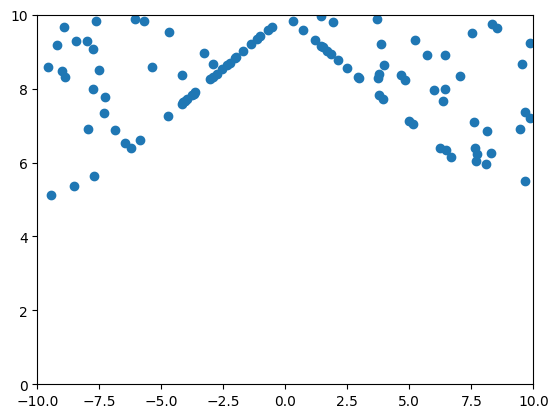

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Definir parâmetros da simulação
g = 9.81  # aceleração gravitacional (m/s^2)
rho = 1.0  # densidade (kg/m^3)
dt = 0.01  # passo de tempo (s)
num_steps = 1000  # número de passos na simulação
num_particles = 100  # número de partículas
radius = 0.1  # raio das partículas (m)
k_n = 1000  # constante da mola normal (N/m)
k_t = 500  # constante da mola tangencial (N/m)
mu = 0.5  # coeficiente de atrito

# Definir a geometria da cunha
wedge_angle = np.deg2rad(30)  # ângulo da cunha em radianos
wedge_height = 10  # altura da cunha (m)
wedge_width = 20  # largura da cunha (m)

# Inicializar posições e velocidades das partículas
positions = np.zeros((num_particles, 2))
velocities = np.zeros((num_particles, 2))

# Distribuir partículas aleatoriamente na parte superior da cunha
positions[:, 0] = np.random.uniform(-wedge_width / 2, wedge_width / 2, num_particles)
positions[:, 1] = np.random.uniform(wedge_height / 2, wedge_height, num_particles)

# Função para calcular forças de contato entre partículas
def compute_forces(positions, velocities):
    forces = np.zeros_like(positions)
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            delta = positions[j] - positions[i]
            dist = np.linalg.norm(delta)
            if dist < 2 * radius:
                # Força normal
                n = delta / dist
                overlap = 2 * radius - dist
                force_n = k_n * overlap * n

                # Força tangencial
                relative_velocity = velocities[j] - velocities[i]
                tangential_velocity = relative_velocity - np.dot(relative_velocity, n) * n
                force_t = -k_t * tangential_velocity
                force_t = np.clip(force_t, -mu * np.linalg.norm(force_n), mu * np.linalg.norm(force_n))

                # Atualizar forças
                forces[i] -= (force_n + force_t)
                forces[j] += (force_n + force_t)

    return forces

# Função para atualizar a simulação
def update_particles(positions, velocities, dt):
    forces = compute_forces(positions, velocities)
    for i in range(num_particles):
        # Atualizar velocidades devido à gravidade e forças de contato
        velocities[i, 1] -= g * dt
        velocities[i] += forces[i] / rho * dt

        # Atualizar posições
        positions[i] += velocities[i] * dt

        # Checar colisão com a cunha
        if positions[i, 1] <= wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle):
            velocities[i, 1] = -velocities[i, 1] * 0.9  # perda de energia na colisão
            positions[i, 1] = wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle)

# Função para animar a simulação
def animate(frame):
    update_particles(positions, velocities, dt)
    scat.set_offsets(positions)
    return scat,

# Configurar visualização
fig, ax = plt.subplots()
ax.set_xlim(-wedge_width / 2, wedge_width / 2)
ax.set_ylim(0, wedge_height)
scat = ax.scatter(positions[:, 0], positions[:, 1])

# Criar animação
ani = FuncAnimation(fig, animate, frames=num_steps, interval=dt*1000, blit=True)

# Mostrar animação
plt.show()


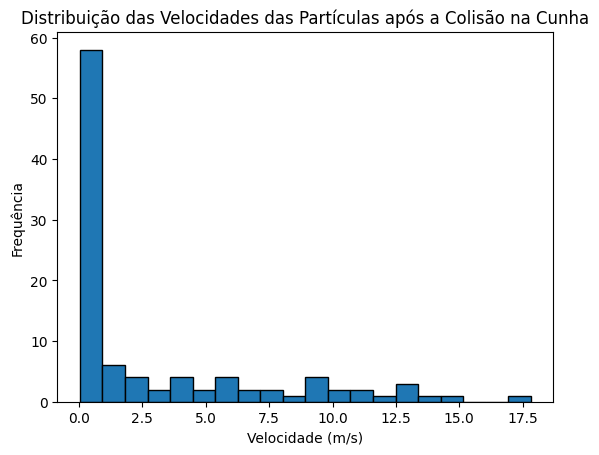

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parâmetros da simulação
g = 9.81  # aceleração gravitacional (m/s^2)
rho = 1.0  # densidade (kg/m^3)
dt = 0.01  # passo de tempo (s)
num_steps = 1000  # número de passos na simulação
num_particles = 100  # número de partículas
radius = 0.1  # raio das partículas (m)
k_n = 1000  # constante da mola normal (N/m)
k_t = 500  # constante da mola tangencial (N/m)
mu = 0.5  # coeficiente de atrito

# Definir a geometria da cunha
wedge_angle = np.deg2rad(30)  # ângulo da cunha em radianos
wedge_height = 10  # altura da cunha (m)
wedge_width = 20  # largura da cunha (m)

# Inicializar posições e velocidades das partículas
positions = np.zeros((num_particles, 2))
velocities = np.zeros((num_particles, 2))

# Distribuir partículas aleatoriamente na parte superior da cunha
positions[:, 0] = np.random.uniform(-wedge_width / 2, wedge_width / 2, num_particles)
positions[:, 1] = np.random.uniform(wedge_height / 2, wedge_height, num_particles)

# Função para calcular forças de contato entre partículas
def compute_forces(positions, velocities):
    forces = np.zeros_like(positions)
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            delta = positions[j] - positions[i]
            dist = np.linalg.norm(delta)
            if dist < 2 * radius:
                # Força normal
                n = delta / dist
                overlap = 2 * radius - dist
                force_n = k_n * overlap * n

                # Força tangencial
                relative_velocity = velocities[j] - velocities[i]
                tangential_velocity = relative_velocity - np.dot(relative_velocity, n) * n
                force_t = -k_t * tangential_velocity
                force_t = np.clip(force_t, -mu * np.linalg.norm(force_n), mu * np.linalg.norm(force_n))

                # Atualizar forças
                forces[i] -= (force_n + force_t)
                forces[j] += (force_n + force_t)

    return forces

# Função para atualizar a simulação
def update_particles(positions, velocities, dt):
    forces = compute_forces(positions, velocities)
    for i in range(num_particles):
        # Atualizar velocidades devido à gravidade e forças de contato
        velocities[i, 1] -= g * dt
        velocities[i] += forces[i] / rho * dt

        # Atualizar posições
        positions[i] += velocities[i] * dt

        # Checar colisão com a cunha
        if positions[i, 1] <= wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle):
            velocities[i, 1] = -velocities[i, 1] * 0.9  # perda de energia na colisão
            positions[i, 1] = wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle)

# Rodar a simulação
for _ in range(num_steps):
    update_particles(positions, velocities, dt)

# Extrair velocidades finais
velocities_magnitude = np.linalg.norm(velocities, axis=1)

# Plotar a distribuição das velocidades
plt.hist(velocities_magnitude, bins=20, edgecolor='black')
plt.xlabel('Velocidade (m/s)')
plt.ylabel('Frequência')
plt.title('Distribuição das Velocidades das Partículas após a Colisão na Cunha')
plt.show()


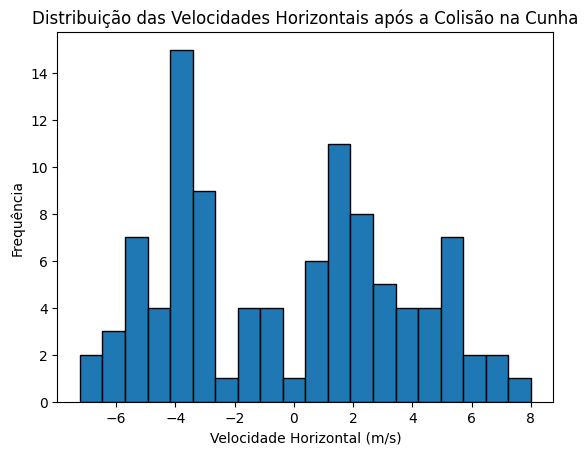

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parâmetros da simulação
g = 9.81  # aceleração gravitacional (m/s^2)
rho = 1.0  # densidade (kg/m^3)
dt = 0.01  # passo de tempo (s)
num_steps = 1000  # número de passos na simulação
num_particles = 100  # número de partículas
radius = 0.1  # raio das partículas (m)
k_n = 1000  # constante da mola normal (N/m)
k_t = 500  # constante da mola tangencial (N/m)
mu = 0.5  # coeficiente de atrito

# Definir a geometria da cunha
wedge_angle = np.deg2rad(30)  # ângulo da cunha em radianos
wedge_height = 10  # altura da cunha (m)
wedge_width = 20  # largura da cunha (m)

# Inicializar posições e velocidades das partículas
positions = np.zeros((num_particles, 2))
velocities = np.zeros((num_particles, 2))

# Distribuir partículas aleatoriamente na parte superior da cunha
positions[:, 0] = np.random.uniform(-wedge_width / 2, wedge_width / 2, num_particles)
positions[:, 1] = np.random.uniform(wedge_height / 2, wedge_height, num_particles)

# Inicializar velocidades verticais
velocities[:, 1] = np.random.uniform(-5, -10, num_particles)

# Função para calcular forças de contato entre partículas
def compute_forces(positions, velocities):
    forces = np.zeros_like(positions)
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            delta = positions[j] - positions[i]
            dist = np.linalg.norm(delta)
            if dist < 2 * radius:
                # Força normal
                n = delta / dist
                overlap = 2 * radius - dist
                force_n = k_n * overlap * n

                # Força tangencial
                relative_velocity = velocities[j] - velocities[i]
                tangential_velocity = relative_velocity - np.dot(relative_velocity, n) * n
                force_t = -k_t * tangential_velocity
                force_t = np.clip(force_t, -mu * np.linalg.norm(force_n), mu * np.linalg.norm(force_n))

                # Atualizar forças
                forces[i] -= (force_n + force_t)
                forces[j] += (force_n + force_t)

    return forces

# Função para atualizar a simulação
def update_particles(positions, velocities, dt):
    forces = compute_forces(positions, velocities)
    for i in range(num_particles):
        # Atualizar velocidades devido à gravidade e forças de contato
        velocities[i, 1] -= g * dt
        velocities[i] += forces[i] / rho * dt

        # Atualizar posições
        positions[i] += velocities[i] * dt

        # Checar colisão com a cunha
        if positions[i, 1] <= wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle):
            # Atualizar velocidades após a colisão com a cunha
            normal = np.array([-np.sign(positions[i, 0]) * np.tan(wedge_angle), 1])
            normal = normal / np.linalg.norm(normal)
            velocity_normal = np.dot(velocities[i], normal) * normal
            velocity_tangential = velocities[i] - velocity_normal

            velocities[i] = -velocity_normal * 0.9 + velocity_tangential  # perda de energia na colisão
            positions[i, 1] = wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle)

# Rodar a simulação
for _ in range(num_steps):
    update_particles(positions, velocities, dt)

# Extrair velocidades horizontais finais após a colisão
horizontal_velocities = velocities[:, 0]

# Plotar a distribuição das velocidades horizontais
plt.hist(horizontal_velocities, bins=20, edgecolor='black')
plt.xlabel('Velocidade Horizontal (m/s)')
plt.ylabel('Frequência')
plt.title('Distribuição das Velocidades Horizontais após a Colisão na Cunha')
plt.show()


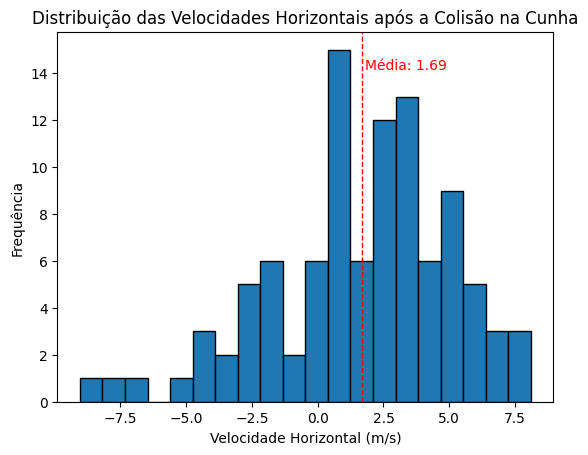

(1.6912163041439947, 3.4081841755055824)

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parâmetros da simulação
g = 9.81  # aceleração gravitacional (m/s^2)
rho = 1.0  # densidade (kg/m^3)
dt = 0.01  # passo de tempo (s)
num_steps = 1000  # número de passos na simulação
num_particles = 100  # número de partículas
radius = 0.1  # raio das partículas (m)
k_n = 1000  # constante da mola normal (N/m)
k_t = 500  # constante da mola tangencial (N/m)
mu = 0.5  # coeficiente de atrito

# Definir a geometria da cunha
wedge_angle = np.deg2rad(30)  # ângulo da cunha em radianos
wedge_height = 10  # altura da cunha (m)
wedge_width = 20  # largura da cunha (m)

# Inicializar posições e velocidades das partículas
positions = np.zeros((num_particles, 2))
velocities = np.zeros((num_particles, 2))

# Distribuir partículas aleatoriamente na parte superior da cunha
positions[:, 0] = np.random.uniform(-wedge_width / 2, wedge_width / 2, num_particles)
positions[:, 1] = np.random.uniform(wedge_height / 2, wedge_height, num_particles)

# Inicializar velocidades verticais
velocities[:, 1] = np.random.uniform(-5, -10, num_particles)

# Função para calcular forças de contato entre partículas
def compute_forces(positions, velocities):
    forces = np.zeros_like(positions)
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            delta = positions[j] - positions[i]
            dist = np.linalg.norm(delta)
            if dist < 2 * radius:
                # Força normal
                n = delta / dist
                overlap = 2 * radius - dist
                force_n = k_n * overlap * n

                # Força tangencial
                relative_velocity = velocities[j] - velocities[i]
                tangential_velocity = relative_velocity - np.dot(relative_velocity, n) * n
                force_t = -k_t * tangential_velocity
                force_t = np.clip(force_t, -mu * np.linalg.norm(force_n), mu * np.linalg.norm(force_n))

                # Atualizar forças
                forces[i] -= (force_n + force_t)
                forces[j] += (force_n + force_t)

    return forces

# Função para atualizar a simulação
def update_particles(positions, velocities, dt):
    forces = compute_forces(positions, velocities)
    for i in range(num_particles):
        # Atualizar velocidades devido à gravidade e forças de contato
        velocities[i, 1] -= g * dt
        velocities[i] += forces[i] / rho * dt

        # Atualizar posições
        positions[i] += velocities[i] * dt

        # Checar colisão com a cunha
        if positions[i, 1] <= wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle):
            # Atualizar velocidades após a colisão com a cunha
            normal = np.array([-np.sign(positions[i, 0]) * np.tan(wedge_angle), 1])
            normal = normal / np.linalg.norm(normal)
            velocity_normal = np.dot(velocities[i], normal) * normal
            velocity_tangential = velocities[i] - velocity_normal

            velocities[i] = -velocity_normal * 0.9 + velocity_tangential  # perda de energia na colisão
            positions[i, 1] = wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle)

# Rodar a simulação
for _ in range(num_steps):
    update_particles(positions, velocities, dt)

# Extrair velocidades horizontais finais após a colisão
horizontal_velocities = velocities[:, 0]

# Calcular média e desvio padrão das velocidades horizontais
mean_velocity = np.mean(horizontal_velocities)
std_velocity = np.std(horizontal_velocities)

# Plotar a distribuição das velocidades horizontais
plt.hist(horizontal_velocities, bins=20, edgecolor='black')
plt.axvline(mean_velocity, color='red', linestyle='dashed', linewidth=1)
plt.text(mean_velocity + 0.1, plt.ylim()[1] * 0.9, f'Média: {mean_velocity:.2f}', color='red')
plt.xlabel('Velocidade Horizontal (m/s)')
plt.ylabel('Frequência')
plt.title('Distribuição das Velocidades Horizontais após a Colisão na Cunha')
plt.show()

mean_velocity, std_velocity


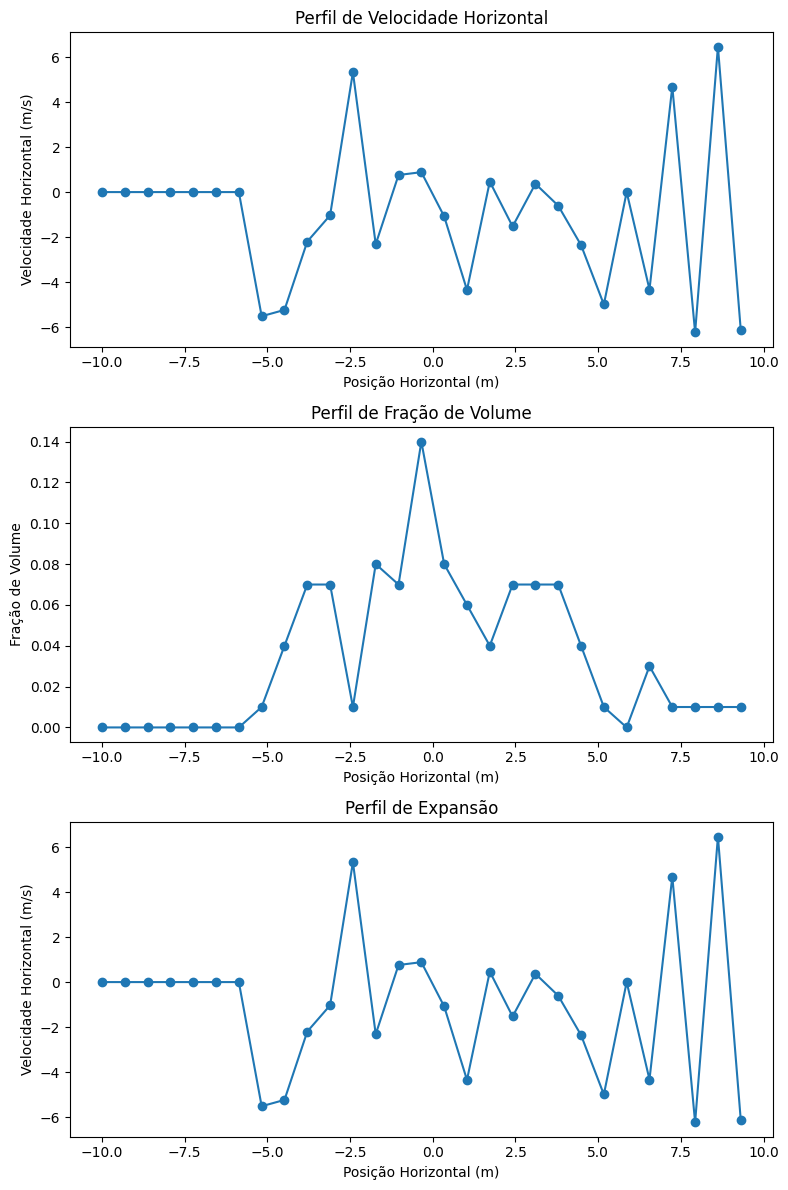

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parâmetros da simulação
g = 9.81  # aceleração gravitacional (m/s^2)
rho = 1.0  # densidade (kg/m^3)
dt = 0.01  # passo de tempo (s)
num_steps = 1000  # número de passos na simulação
num_particles = 100  # número de partículas
radius = 0.1  # raio das partículas (m)
k_n = 1000  # constante da mola normal (N/m)
k_t = 500  # constante da mola tangencial (N/m)
mu = 0.5  # coeficiente de atrito

# Definir a geometria da cunha
wedge_angle = np.deg2rad(30)  # ângulo da cunha em radianos
wedge_height = 10  # altura da cunha (m)
wedge_width = 20  # largura da cunha (m)

# Inicializar posições e velocidades das partículas
positions = np.zeros((num_particles, 2))
velocities = np.zeros((num_particles, 2))

# Distribuir partículas aleatoriamente na parte superior da cunha
positions[:, 0] = np.random.uniform(-wedge_width / 2, wedge_width / 2, num_particles)
positions[:, 1] = np.random.uniform(wedge_height / 2, wedge_height, num_particles)

# Inicializar velocidades verticais
velocities[:, 1] = np.random.uniform(-5, -10, num_particles)

# Função para calcular forças de contato entre partículas
def compute_forces(positions, velocities):
    forces = np.zeros_like(positions)
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            delta = positions[j] - positions[i]
            dist = np.linalg.norm(delta)
            if dist < 2 * radius:
                # Força normal
                n = delta / dist
                overlap = 2 * radius - dist
                force_n = k_n * overlap * n

                # Força tangencial
                relative_velocity = velocities[j] - velocities[i]
                tangential_velocity = relative_velocity - np.dot(relative_velocity, n) * n
                force_t = -k_t * tangential_velocity
                force_t = np.clip(force_t, -mu * np.linalg.norm(force_n), mu * np.linalg.norm(force_n))

                # Atualizar forças
                forces[i] -= (force_n + force_t)
                forces[j] += (force_n + force_t)

    return forces

# Função para atualizar a simulação
def update_particles(positions, velocities, dt):
    forces = compute_forces(positions, velocities)
    for i in range(num_particles):
        # Atualizar velocidades devido à gravidade e forças de contato
        velocities[i, 1] -= g * dt
        velocities[i] += forces[i] / rho * dt

        # Atualizar posições
        positions[i] += velocities[i] * dt

        # Checar colisão com a cunha
        if positions[i, 1] <= wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle):
            # Atualizar velocidades após a colisão com a cunha
            normal = np.array([-np.sign(positions[i, 0]) * np.tan(wedge_angle), 1])
            normal = normal / np.linalg.norm(normal)
            velocity_normal = np.dot(velocities[i], normal) * normal
            velocity_tangential = velocities[i] - velocity_normal

            velocities[i] = -velocity_normal * 0.9 + velocity_tangential  # perda de energia na colisão
            positions[i, 1] = wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle)

# Rodar a simulação
for _ in range(num_steps):
    update_particles(positions, velocities, dt)

# Extrair velocidades horizontais finais após a colisão
horizontal_velocities = velocities[:, 0]

# Criar perfis de velocidade horizontal e fração de volume
bins = np.linspace(-wedge_width / 2, wedge_width / 2, 30)
velocity_profile = np.zeros(len(bins) - 1)
volume_fraction = np.zeros(len(bins) - 1)

for i in range(len(bins) - 1):
    indices = (positions[:, 0] >= bins[i]) & (positions[:, 0] < bins[i + 1])
    if np.sum(indices) > 0:
        velocity_profile[i] = np.mean(horizontal_velocities[indices])
        volume_fraction[i] = np.sum(indices) / num_particles

# Plotar perfis de velocidade horizontal e fração de volume
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Perfil de velocidade horizontal
ax[0].plot(bins[:-1], velocity_profile, 'o-')
ax[0].set_xlabel('Posição Horizontal (m)')
ax[0].set_ylabel('Velocidade Horizontal (m/s)')
ax[0].set_title('Perfil de Velocidade Horizontal')

# Fração de volume
ax[1].plot(bins[:-1], volume_fraction, 'o-')
ax[1].set_xlabel('Posição Horizontal (m)')
ax[1].set_ylabel('Fração de Volume')
ax[1].set_title('Perfil de Fração de Volume')

# Perfil de expansão (assumindo que a expansão é apenas na direção horizontal para simplicidade)
ax[2].plot(bins[:-1], velocity_profile, 'o-')
ax[2].set_xlabel('Posição Horizontal (m)')
ax[2].set_ylabel('Velocidade Horizontal (m/s)')
ax[2].set_title('Perfil de Expansão')

plt.tight_layout()
plt.show()


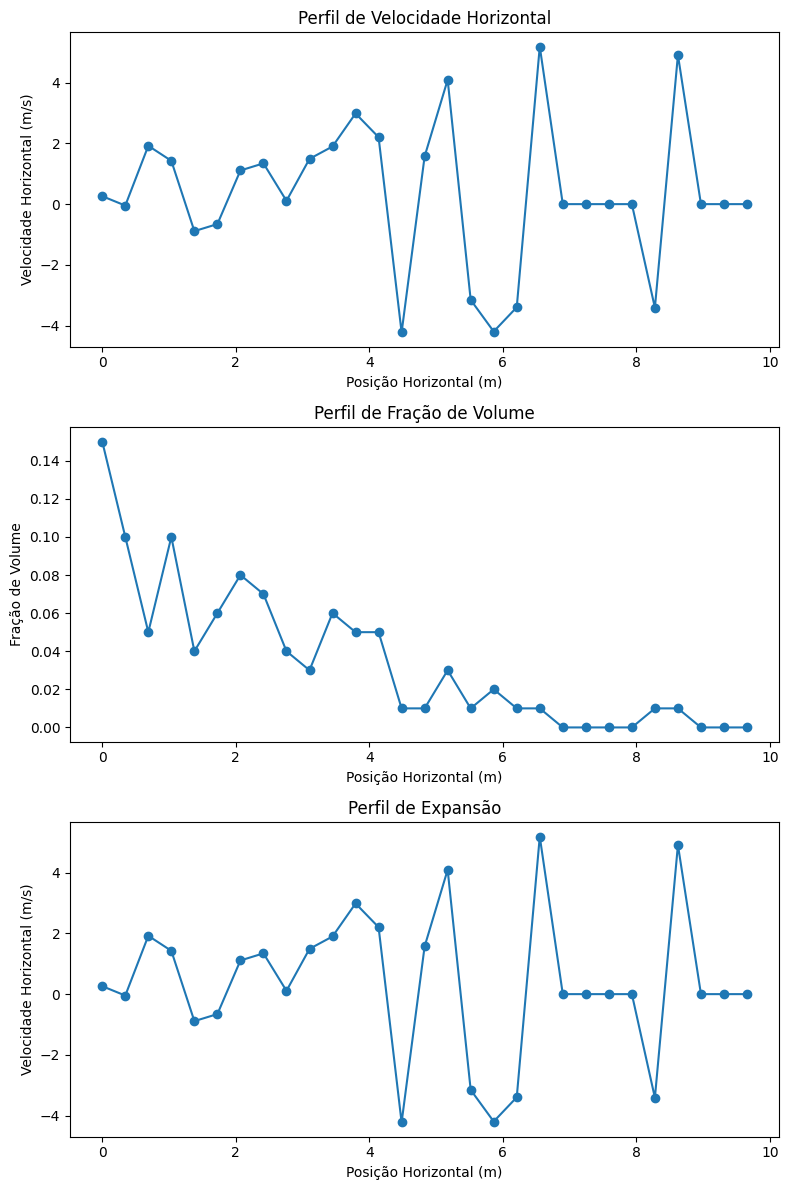

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir parâmetros da simulação
g = 9.81  # aceleração gravitacional (m/s^2)
rho = 1.0  # densidade (kg/m^3)
dt = 0.01  # passo de tempo (s)
num_steps = 1000  # número de passos na simulação
num_particles = 100  # número de partículas
radius = 0.1  # raio das partículas (m)
k_n = 1000  # constante da mola normal (N/m)
k_t = 500  # constante da mola tangencial (N/m)
mu = 0.5  # coeficiente de atrito

# Definir a geometria da cunha
wedge_angle = np.deg2rad(30)  # ângulo da cunha em radianos
wedge_height = 10  # altura da cunha (m)
wedge_width = 20  # largura da cunha (m)

# Inicializar posições e velocidades das partículas
positions = np.zeros((num_particles, 2))
velocities = np.zeros((num_particles, 2))

# Distribuir partículas aleatoriamente na parte superior da cunha
positions[:, 0] = np.random.uniform(-wedge_width / 2, wedge_width / 2, num_particles)
positions[:, 1] = np.random.uniform(wedge_height / 2, wedge_height, num_particles)

# Inicializar velocidades verticais
velocities[:, 1] = np.random.uniform(-5, -10, num_particles)

# Função para calcular forças de contato entre partículas
def compute_forces(positions, velocities):
    forces = np.zeros_like(positions)
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            delta = positions[j] - positions[i]
            dist = np.linalg.norm(delta)
            if dist < 2 * radius:
                # Força normal
                n = delta / dist
                overlap = 2 * radius - dist
                force_n = k_n * overlap * n

                # Força tangencial
                relative_velocity = velocities[j] - velocities[i]
                tangential_velocity = relative_velocity - np.dot(relative_velocity, n) * n
                force_t = -k_t * tangential_velocity
                force_t = np.clip(force_t, -mu * np.linalg.norm(force_n), mu * np.linalg.norm(force_n))

                # Atualizar forças
                forces[i] -= (force_n + force_t)
                forces[j] += (force_n + force_t)

    return forces

# Função para atualizar a simulação
def update_particles(positions, velocities, dt):
    forces = compute_forces(positions, velocities)
    for i in range(num_particles):
        # Atualizar velocidades devido à gravidade e forças de contato
        velocities[i, 1] -= g * dt
        velocities[i] += forces[i] / rho * dt

        # Atualizar posições
        positions[i] += velocities[i] * dt

        # Checar colisão com a cunha
        if positions[i, 1] <= wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle):
            # Atualizar velocidades após a colisão com a cunha
            normal = np.array([-np.sign(positions[i, 0]) * np.tan(wedge_angle), 1])
            normal = normal / np.linalg.norm(normal)
            velocity_normal = np.dot(velocities[i], normal) * normal
            velocity_tangential = velocities[i] - velocity_normal

            velocities[i] = -velocity_normal * 0.9 + velocity_tangential  # perda de energia na colisão
            positions[i, 1] = wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle)

# Rodar a simulação
for _ in range(num_steps):
    update_particles(positions, velocities, dt)

# Espelhar posições para simetria
positions_mirrored = np.abs(positions[:, 0])
horizontal_velocities_mirrored = horizontal_velocities = velocities[:, 0]

# Criar perfis de velocidade horizontal e fração de volume
bins = np.linspace(0, wedge_width / 2, 30)
velocity_profile = np.zeros(len(bins) - 1)
volume_fraction = np.zeros(len(bins) - 1)

for i in range(len(bins) - 1):
    indices = (positions_mirrored >= bins[i]) & (positions_mirrored < bins[i + 1])
    if np.sum(indices) > 0:
        velocity_profile[i] = np.mean(horizontal_velocities_mirrored[indices])
        volume_fraction[i] = np.sum(indices) / num_particles

# Plotar perfis de velocidade horizontal e fração de volume
fig, ax = plt.subplots(3, 1, figsize=(8, 12))

# Perfil de velocidade horizontal
ax[0].plot(bins[:-1], velocity_profile, 'o-')
ax[0].set_xlabel('Posição Horizontal (m)')
ax[0].set_ylabel('Velocidade Horizontal (m/s)')
ax[0].set_title('Perfil de Velocidade Horizontal')

# Fração de volume
ax[1].plot(bins[:-1], volume_fraction, 'o-')
ax[1].set_xlabel('Posição Horizontal (m)')
ax[1].set_ylabel('Fração de Volume')
ax[1].set_title('Perfil de Fração de Volume')

# Perfil de expansão (assumindo que a expansão é apenas na direção horizontal para simplicidade)
ax[2].plot(bins[:-1], velocity_profile, 'o-')
ax[2].set_xlabel('Posição Horizontal (m)')
ax[2].set_ylabel('Velocidade Horizontal (m/s)')
ax[2].set_title('Perfil de Expansão')

plt.tight_layout()
plt.show()


In [ ]:
# Código modificado para gerar um gráfico de densidade por distância

import numpy as np
import matplotlib.pyplot as plt

# Definir parâmetros da simulação
g = 9.81  # aceleração gravitacional (m/s^2)
rho = 1.0  # densidade (kg/m^3)
dt = 0.01  # passo de tempo (s)
num_steps = 1000  # número de passos na simulação
num_particles = 100  # número de partículas
radius = 0.1  # raio das partículas (m)
k_n = 1000  # constante da mola normal (N/m)
k_t = 500  # constante da mola tangencial (N/m)
mu = 0.5  # coeficiente de atrito

# Definir a geometria da cunha
wedge_angle = np.deg2rad(30)  # ângulo da cunha em radianos
wedge_height = 10  # altura da cunha (m)
wedge_width = 20  # largura da cunha (m)

# Inicializar posições e velocidades das partículas
positions = np.zeros((num_particles, 2))
velocities = np.zeros((num_particles, 2))

# Distribuir partículas aleatoriamente na parte superior da cunha
positions[:, 0] = np.random.uniform(-wedge_width / 2, wedge_width / 2, num_particles)
positions[:, 1] = np.random.uniform(wedge_height / 2, wedge_height, num_particles)

# Inicializar velocidades verticais
velocities[:, 1] = np.random.uniform(-5, -10, num_particles)

# Função para calcular forças de contato entre partículas
def compute_forces(positions, velocities):
    forces = np.zeros_like(positions)
    for i in range(num_particles):
        for j in range(i + 1, num_particles):
            delta = positions[j] - positions[i]
            dist = np.linalg.norm(delta)
            if dist < 2 * radius:
                # Força normal
                n = delta / dist
                overlap = 2 * radius - dist
                force_n = k_n * overlap * n

                # Força tangencial
                relative_velocity = velocities[j] - velocities[i]
                tangential_velocity = relative_velocity - np.dot(relative_velocity, n) * n
                force_t = -k_t * tangential_velocity
                force_t = np.clip(force_t, -mu * np.linalg.norm(force_n), mu * np.linalg.norm(force_n))

                # Atualizar forças
                forces[i] -= (force_n + force_t)
                forces[j] += (force_n + force_t)

    return forces

# Função para atualizar a simulação
def update_particles(positions, velocities, dt):
    forces = compute_forces(positions, velocities)
    for i in range(num_particles):
        # Atualizar velocidades devido à gravidade e forças de contato
        velocities[i, 1] -= g * dt
        velocities[i] += forces[i] / rho * dt

        # Atualizar posições
        positions[i] += velocities[i] * dt

        # Checar colisão com a cunha
        if positions[i, 1] <= wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle):
            # Atualizar velocidades após a colisão com a cunha
            normal = np.array([-np.sign(positions[i, 0]) * np.tan(wedge_angle), 1])
            normal = normal / np.linalg.norm(normal)
            velocity_normal = np.dot(velocities[i], normal) * normal
            velocity_tangential = velocities[i] - velocity_normal

            velocities[i] = -velocity_normal * 0.9 + velocity_tangential  # perda de energia na colisão
            positions[i, 1] = wedge_height - np.abs(positions[i, 0]) * np.tan(wedge_angle)

# Rodar a simulação
for _ in range(num_steps):
    update_particles(positions, velocities, dt)

# Espelhar posições para simetria
positions_mirrored = np.abs(positions[:, 0])

# Criar perfis de densidade por distância
bins = np.linspace(0, wedge_width / 2, 30)
density_profile = np.zeros(len(bins) - 1)

for i in range(len(bins) - 1):
    indices = (positions_mirrored >= bins[i]) & (positions_mirrored < bins[i + 1])
    density_profile[i] = np.sum(indices) / ((bins[i + 1] - bins[i]) * wedge_height)  # densidade como número de partículas por unidade de volume

# Plotar perfil de densidade por distância
plt.plot(bins[:-1], density_profile, 'o-')
plt.xlabel('Posição Horizontal (m)')
plt.ylabel('Densidade (partículas/m^3)')
plt.title('Perfil de Densidade por Distância')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
n = 100  # número de partículas
m = 1.0  # massa das partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade

# Inicializar posições e velocidades aleatórias para as partículas
np.random.seed(42)  # para reprodutibilidade
positions = np.random.uniform(-2, 2, (n, 2))
positions[:, 1] = np.random.uniform(1, 3, n)  # apenas posições y positivas
velocities = np.random.uniform(-1, 1, (n, 2))
velocities[:, 1] = np.random.uniform(-1, -0.5, n)  # partículas caindo para baixo

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 3)
particles, = ax.plot([], [], 'bo', ms=5)

# Desenhar a cunha com o pico para cima
wedge_x = [-1, 0, 1]
wedge_y = [-1, 1, -1]
ax.fill(wedge_x, wedge_y, 'k')

def init():
    particles.set_data([], [])
    return particles,

def reflect(velocity, normal):
    return velocity - 2 * np.dot(velocity, normal) * normal

def detect_collision(position):
    if position[1] >= 1 or position[1] <= -1:
        return None
    if position[0] < 0 and position[1] > 0 and position[0] > -1 + position[1]:
        normal = np.array([1, -1]) / np.sqrt(2)
    elif position[0] > 0 and position[1] > 0 and position[0] < 1 - position[1]:
        normal = np.array([-1, -1]) / np.sqrt(2)
    elif position[1] < 0 and np.abs(position[0]) < 1:
        normal = np.array([0, 1])
    else:
        return None
    return normal

def update(frame):
    dt = 0.02
    global positions, velocities

    # Atualizar posições
    positions += velocities * dt

    # Adicionar efeito da gravidade
    velocities[:, 1] -= g * dt

    # Detectar colisões entre partículas
    for i in range(n):
        for j in range(i + 1, n):
            if np.linalg.norm(positions[i] - positions[j]) < 0.1:
                # Calcular o vetor unitário ao longo da linha de impacto
                k = (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
                # Calcular a velocidade relativa inicial
                relative_velocity_initial = velocities[i] - velocities[j]
                # Calcular a componente da velocidade relativa na direção do impacto
                relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
                # Calcular a velocidade relativa tangencial (não afetada pela colisão)
                relative_velocity_tangential = relative_velocity_initial - relative_velocity_normal
                # Calcular a velocidade normal final após a colisão
                relative_velocity_normal_final = -e * relative_velocity_normal
                # Calcular a velocidade final das partículas
                velocities[i] += (relative_velocity_normal_final - relative_velocity_normal) / 2
                velocities[j] -= (relative_velocity_normal_final - relative_velocity_normal) / 2

        # Detectar colisões com a cunha
        normal = detect_collision(positions[i])
        if normal is not None:
            velocities[i] = reflect(velocities[i], normal)
            if normal[1] == 1:
                positions[i, 1] = max(positions[i, 1], -1)
            else:
                positions[i, 1] = min(positions[i, 1], 1)

    # Atualizar os dados das partículas para o gráfico
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particulas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=20))

plt.close(fig)

gif_path

'particulas_colidem.gif'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
n = 100  # número de partículas
m = 1.0  # massa das partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade

# Inicializar posições e velocidades aleatórias para as partículas
np.random.seed(42)  # para reprodutibilidade
positions = np.random.uniform(-2, 2, (n, 2))
positions[:, 1] = np.random.uniform(1, 3, n)  # apenas posições y positivas
velocities = np.random.uniform(-1, 1, (n, 2))
velocities[:, 1] = np.random.uniform(-1, -0.5, n)  # partículas caindo para baixo

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 3)
particles, = ax.plot([], [], 'bo', ms=5)

# Desenhar a cunha com o pico para cima
wedge_x = [-1, 0, 1]
wedge_y = [-1, 1, -1]
ax.fill(wedge_x, wedge_y, 'k')

def init():
    particles.set_data([], [])
    return particles,

def reflect(velocity, normal):
    return velocity - 2 * np.dot(velocity, normal) * normal

def detect_collision(position):
    if position[1] >= 1 or position[1] <= -1:
        return None
    if position[0] < 0 and position[1] > 0 and position[0] > -1 + position[1]:
        normal = np.array([1, -1]) / np.sqrt(2)
    elif position[0] > 0 and position[1] > 0 and position[0] < 1 - position[1]:
        normal = np.array([-1, -1]) / np.sqrt(2)
    elif position[1] < 0 and np.abs(position[0]) < 1:
        normal = np.array([0, 1])
    else:
        return None
    return normal

def update(frame):
    dt = 0.02
    global positions, velocities

    # Atualizar posições
    positions += velocities * dt

    # Adicionar efeito da gravidade
    velocities[:, 1] -= g * dt

    # Detectar colisões entre partículas
    for i in range(n):
        for j in range(i + 1, n):
            if np.linalg.norm(positions[i] - positions[j]) < 0.1:
                # Calcular o vetor unitário ao longo da linha de impacto
                k = (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
                # Calcular a velocidade relativa inicial
                relative_velocity_initial = velocities[i] - velocities[j]
                # Calcular a componente da velocidade relativa na direção do impacto
                relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
                # Calcular a velocidade relativa tangencial (não afetada pela colisão)
                relative_velocity_tangential = relative_velocity_initial - relative_velocity_normal
                # Calcular a velocidade normal final após a colisão
                relative_velocity_normal_final = -e * relative_velocity_normal
                # Calcular a velocidade final das partículas
                velocities[i] += (relative_velocity_normal_final - relative_velocity_normal) / 2
                velocities[j] -= (relative_velocity_normal_final - relative_velocity_normal) / 2
                positions[i] += relative_velocity_normal_final * dt
                positions[j] -= relative_velocity_normal_final * dt

        # Detectar colisões com a cunha
        normal = detect_collision(positions[i])
        if normal is not None:
            velocities[i] = reflect(velocities[i], normal)
            if normal[1] == 1:
                positions[i, 1] = max(positions[i, 1], -1)
            else:
                positions[i, 1] = min(positions[i, 1], 1)

    # Atualizar os dados das partículas para o gráfico
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particulas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=20))

plt.close(fig)

gif_path


'particulas_colidem.gif'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
n = 100  # número de partículas
m = 1.0  # massa das partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade

# Inicializar posições e velocidades aleatórias para as partículas
np.random.seed(42)  # para reprodutibilidade
positions = np.random.uniform(-2, 2, (n, 2))
positions[:, 1] = np.random.uniform(1, 3, n)  # apenas posições y positivas
velocities = np.random.uniform(-1, 1, (n, 2))
velocities[:, 1] = np.random.uniform(-1, -0.5, n)  # partículas caindo para baixo

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 3)
particles, = ax.plot([], [], 'bo', ms=5)

# Desenhar a cunha com o pico para cima
wedge_x = [-1, 0, 1]
wedge_y = [-1, 1, -1]
ax.fill(wedge_x, wedge_y, 'k')

def init():
    particles.set_data([], [])
    return particles,

def reflect(velocity, normal):
    return velocity - 2 * np.dot(velocity, normal) * normal

def detect_collision(position):
    if position[1] < -1 or position[1] > 1:
        return None
    if position[0] < -1 or position[0] > 1:
        return None

    if position[1] > 0 and abs(position[0]) < position[1]:
        if position[0] < 0:
            normal = np.array([1, -1]) / np.sqrt(2)
        else:
            normal = np.array([-1, -1]) / np.sqrt(2)
    else:
        normal = np.array([0, 1])

    return normal

def update(frame):
    dt = 0.02
    global positions, velocities

    # Atualizar posições
    positions += velocities * dt

    # Adicionar efeito da gravidade
    velocities[:, 1] -= g * dt

    # Detectar colisões entre partículas
    for i in range(n):
        for j in range(i + 1, n):
            if np.linalg.norm(positions[i] - positions[j]) < 0.1:
                k = (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
                relative_velocity_initial = velocities[i] - velocities[j]
                relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
                relative_velocity_normal_final = -e * relative_velocity_normal
                velocities[i] += (relative_velocity_normal_final - relative_velocity_normal) / 2
                velocities[j] -= (relative_velocity_normal_final - relative_velocity_normal) / 2
                positions[i] += relative_velocity_normal_final * dt
                positions[j] -= relative_velocity_normal_final * dt

        # Detectar colisões com a cunha
        normal = detect_collision(positions[i])
        if normal is not None:
            velocities[i] = reflect(velocities[i], normal)
            if normal[1] == 1:
                positions[i, 1] = max(positions[i, 1], -1)
            else:
                positions[i, 1] = min(positions[i, 1], 1)

    # Atualizar os dados das partículas para o gráfico
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particulas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=20))

plt.close(fig)

gif_path


'particulas_colidem.gif'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
n = 100  # número de partículas
m = 1.0  # massa das partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade

# Inicializar posições e velocidades aleatórias para as partículas
np.random.seed(42)  # para reprodutibilidade
positions = np.random.uniform(-2, 2, (n, 2))
positions[:, 1] = np.random.uniform(1, 3, n)  # apenas posições y positivas
velocities = np.random.uniform(-1, 1, (n, 2))
velocities[:, 1] = np.random.uniform(-1, -0.5, n)  # partículas caindo para baixo

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-2, 2)
ax.set_ylim(-1, 3)
particles, = ax.plot([], [], 'bo', ms=5)

# Desenhar a cunha com o pico para cima
wedge_x = [-1, 0, 1]
wedge_y = [-1, 1, -1]
ax.fill(wedge_x, wedge_y, 'k')

def init():
    particles.set_data([], [])
    return particles,

def reflect(velocity, normal):
    return velocity - 2 * np.dot(velocity, normal) * normal

def detect_collision(position):
    if position[1] < 1 and position[1] > -1:
        if position[0] > -1 and position[0] < 1:
            if position[1] > abs(position[0]) - 1:
                if position[0] < 0:
                    normal = np.array([1, -1]) / np.sqrt(2)
                else:
                    normal = np.array([-1, -1]) / np.sqrt(2)
            else:
                normal = np.array([0, 1])
            return normal
    return None

def update(frame):
    dt = 0.02
    global positions, velocities

    # Atualizar posições
    positions += velocities * dt

    # Adicionar efeito da gravidade
    velocities[:, 1] -= g * dt

    # Detectar colisões entre partículas
    for i in range(n):
        for j in range(i + 1, n):
            if np.linalg.norm(positions[i] - positions[j]) < 0.1:
                k = (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
                relative_velocity_initial = velocities[i] - velocities[j]
                relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
                relative_velocity_normal_final = -e * relative_velocity_normal
                velocities[i] += (relative_velocity_normal_final - relative_velocity_normal) / 2
                velocities[j] -= (relative_velocity_normal_final - relative_velocity_normal) / 2

        # Detectar colisões com a cunha
        normal = detect_collision(positions[i])
        if normal is not None:
            velocities[i] = reflect(velocities[i], normal)
            if normal[1] == 1:
                positions[i, 1] = max(positions[i, 1], -1)
            else:
                positions[i, 1] = min(positions[i, 1], 1)

    # Atualizar os dados das partículas para o gráfico
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particulas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=30))

plt.close(fig)

gif_path


'particulas_colidem.gif'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
n = 100  # número de partículas
m = 1.0  # massa das partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade

# Inicializar posições e velocidades aleatórias para as partículas
np.random.seed(42)  # para reprodutibilidade
positions = np.random.uniform(-3, 3, (n, 2))
positions[:, 1] = np.random.uniform(1, 5, n)  # apenas posições y positivas
velocities = np.random.uniform(-1, 1, (n, 2))
velocities[:, 1] = np.random.uniform(-1, -0.5, n)  # partículas caindo para baixo

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 5)
particles, = ax.plot([], [], 'bo', ms=5)

# Desenhar a cunha com o pico para cima na nova posição (-0.5, 0.5)
wedge_x = [-1.5, -0.5, 0.5]
wedge_y = [-1.5, 0.5, -1.5]
ax.fill(wedge_x, wedge_y, 'k')

def init():
    particles.set_data([], [])
    return particles,

def reflect(velocity, normal):
    return velocity - 2 * np.dot(velocity, normal) * normal

def detect_collision(position):
    if position[1] < -1.5 or position[1] > 0.5:
        return None
    if position[0] < -1.5 or position[0] > 0.5:
        return None

    if position[1] > position[0] + 1 and position[1] > -position[0] - 1:
        if position[0] < -0.5:
            normal = np.array([1, -1]) / np.sqrt(2)
        else:
            normal = np.array([-1, -1]) / np.sqrt(2)
    else:
        normal = np.array([0, 1])

    return normal

def update(frame):
    dt = 0.02
    global positions, velocities

    # Atualizar posições
    positions += velocities * dt

    # Adicionar efeito da gravidade
    velocities[:, 1] -= g * dt

    # Detectar colisões entre partículas
    for i in range(n):
        for j in range(i + 1, n):
            if np.linalg.norm(positions[i] - positions[j]) < 0.1:
                k = (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
                relative_velocity_initial = velocities[i] - velocities[j]
                relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
                relative_velocity_normal_final = -e * relative_velocity_normal
                velocities[i] += (relative_velocity_normal_final - relative_velocity_normal) / 2
                velocities[j] -= (relative_velocity_normal_final - relative_velocity_normal) / 2

        # Detectar colisões com a cunha
        normal = detect_collision(positions[i])
        if normal is not None:
            velocities[i] = reflect(velocities[i], normal)
            if normal[1] == 1:
                positions[i, 1] = max(positions[i, 1], -1.5)
            else:
                positions[i, 1] = min(positions[i, 1], 0.5)

    # Atualizar os dados das partículas para o gráfico
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particulas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=20))

plt.close(fig)

gif_path


'particulas_colidem.gif'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
n = 100  # número de partículas
m = 1.0  # massa das partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade

# Inicializar posições e velocidades aleatórias para as partículas
np.random.seed(42)  # para reprodutibilidade
positions = np.random.uniform(-3, 3, (n, 2))
positions[:, 1] = np.random.uniform(1, 5, n)  # apenas posições y positivas
velocities = np.random.uniform(-1, 1, (n, 2))
velocities[:, 1] = np.random.uniform(-1, -0.5, n)  # partículas caindo para baixo

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 5)
particles, = ax.plot([], [], 'bo', ms=5)

# Desenhar a cunha com o pico para cima na nova posição (-0.5, 0.5)
wedge_x = [-1.5, -0.5, 0.5]
wedge_y = [-1.5, 0.5, -1.5]
ax.fill(wedge_x, wedge_y, 'k')

def init():
    particles.set_data([], [])
    return particles,

def reflect(velocity, normal):
    return velocity - 2 * np.dot(velocity, normal) * normal

def detect_collision(position):
    if position[1] < -1.5 or position[1] > 0.5:
        return None
    if position[0] < -1.5 or position[0] > 0.5:
        return None

    if position[1] > position[0] + 1 and position[1] > -position[0] - 1:
        if position[0] < -0.5:
            normal = np.array([1, -1]) / np.sqrt(2)
        else:
            normal = np.array([-1, -1]) / np.sqrt(2)
    else:
        normal = np.array([0, 1])

    return normal

def update(frame):
    dt = 0.02
    global positions, velocities

    # Atualizar posições
    positions += velocities * dt

    # Adicionar efeito da gravidade
    velocities[:, 1] -= g * dt

    # Detectar colisões entre partículas
    for i in range(n):
        for j in range(i + 1, n):
            if np.linalg.norm(positions[i] - positions[j]) < 0.1:
                k = (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
                relative_velocity_initial = velocities[i] - velocities[j]
                relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
                relative_velocity_normal_final = -e * relative_velocity_normal
                velocities[i] += (relative_velocity_normal_final - relative_velocity_normal) / 2
                velocities[j] -= (relative_velocity_normal_final - relative_velocity_normal) / 2

        # Detectar colisões com a cunha
        normal = detect_collision(positions[i])
        if normal is not None:
            velocities[i] = reflect(velocities[i], normal)
            if normal[1] == 1:
                positions[i, 1] = max(positions[i, 1], -1.5)
            else:
                positions[i, 1] = min(positions[i, 1], 0.5)

    # Atualizar os dados das partículas para o gráfico
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particulas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=20))

plt.close(fig)

gif_path


'particulas_colidem.gif'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
n = 100  # número de partículas
m = 1.0  # massa das partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade

# Inicializar posições e velocidades aleatórias para as partículas
np.random.seed(42)  # para reprodutibilidade
positions = np.random.uniform(-3, 3, (n, 2))
positions[:, 1] = np.random.uniform(1, 5, n)  # apenas posições y positivas
velocities = np.random.uniform(-1, 1, (n, 2))
velocities[:, 1] = np.random.uniform(-1, -0.5, n)  # partículas caindo para baixo

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 5)
particles, = ax.plot([], [], 'bo', ms=5)

# Desenhar a cunha com o pico para cima na nova posição (-0.5, 0.5)
wedge_x = [-1.5, -0.5, 0.5]
wedge_y = [-1.5, 0.5, -1.5]
ax.fill(wedge_x, wedge_y, 'k')

def init():
    particles.set_data([], [])
    return particles,

def reflect(velocity, normal):
    return velocity - 2 * np.dot(velocity, normal) * normal

def detect_collision(position):
    if position[1] < 0.5 and position[1] > -1.5:
        if position[0] > -1.5 and position[0] < 0.5:
            if position[1] > position[0] + 1 and position[1] > -position[0] - 1:
                if position[0] < -0.5:
                    normal = np.array([1, -1]) / np.sqrt(2)
                else:
                    normal = np.array([-1, -1]) / np.sqrt(2)
            else:
                normal = np.array([0, 1])
            return normal
    return None

def update(frame):
    dt = 0.02
    global positions, velocities

    # Atualizar posições
    positions += velocities * dt

    # Adicionar efeito da gravidade
    velocities[:, 1] -= g * dt

    # Detectar colisões com a cunha
    for i in range(n):
        normal = detect_collision(positions[i])
        if normal is not None:
            velocities[i] = reflect(velocities[i], normal)
            # Reposicionar a partícula para evitar múltiplas detecções de colisão consecutivas
            positions[i] += normal * 0.05

    # Detectar colisões entre partículas
    for i in range(n):
        for j in range(i + 1, n):
            if np.linalg.norm(positions[i] - positions[j]) < 0.1:
                k = (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
                relative_velocity_initial = velocities[i] - velocities[j]
                relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
                relative_velocity_normal_final = -e * relative_velocity_normal
                velocities[i] += (relative_velocity_normal_final - relative_velocity_normal) / 2
                velocities[j] -= (relative_velocity_normal_final - relative_velocity_normal) / 2

    # Atualizar os dados das partículas para o gráfico
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particulas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=20))

plt.close(fig)

gif_path


'particulas_colidem.gif'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
n = 100  # número de partículas
m = 1.0  # massa das partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade

# Inicializar posições e velocidades aleatórias para as partículas
np.random.seed(42)  # para reprodutibilidade
positions = np.random.uniform(-3, 3, (n, 2))
positions[:, 1] = np.random.uniform(1, 5, n)  # apenas posições y positivas
velocities = np.random.uniform(-1, 1, (n, 2))
velocities[:, 1] = np.random.uniform(-1, -0.5, n)  # partículas caindo para baixo

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 5)
particles, = ax.plot([], [], 'bo', ms=5)

# Desenhar a cunha com o pico para cima na nova posição (-0.5, 0.5)
wedge_x = [-1.5, -0.5, 0.5]
wedge_y = [-1.5, 0.5, -1.5]
ax.fill(wedge_x, wedge_y, 'k')

def init():
    particles.set_data([], [])
    return particles,

def reflect(velocity, normal):
    return velocity - 2 * np.dot(velocity, normal) * normal

def detect_collision(position):
    if -1.5 < position[1] < 0.5 and -1.5 < position[0] < 0.5:
        if position[1] > (position[0] + 1) or position[1] > (-position[0] + 1):
            if position[0] < -0.5:
                normal = np.array([1, -1]) / np.sqrt(2)
            else:
                normal = np.array([-1, -1]) / np.sqrt(2)
        else:
            normal = np.array([0, 1])
        return normal
    return None

def update(frame):
    dt = 0.02
    global positions, velocities

    # Atualizar posições
    positions += velocities * dt

    # Adicionar efeito da gravidade
    velocities[:, 1] -= g * dt

    # Detectar colisões com a cunha
    for i in range(n):
        normal = detect_collision(positions[i])
        if normal is not None:
            velocities[i] = reflect(velocities[i], normal)
            positions[i] += normal * 0.1  # Reposicionar a partícula para evitar múltiplas detecções de colisão consecutivas

    # Detectar colisões entre partículas
    for i in range(n):
        for j in range(i + 1, n):
            if np.linalg.norm(positions[i] - positions[j]) < 0.1:
                k = (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
                relative_velocity_initial = velocities[i] - velocities[j]
                relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
                relative_velocity_normal_final = -e * relative_velocity_normal
                velocities[i] += (relative_velocity_normal_final - relative_velocity_normal) / 2
                velocities[j] -= (relative_velocity_normal_final - relative_velocity_normal) / 2

    # Atualizar os dados das partículas para o gráfico
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particulas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=20))

plt.close(fig)

gif_path


'particulas_colidem.gif'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
n = 100  # número de partículas
m = 1.0  # massa das partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade

# Inicializar posições e velocidades aleatórias para as partículas
np.random.seed(42)  # para reprodutibilidade
positions = np.random.uniform(-3, 3, (n, 2))
positions[:, 1] = np.random.uniform(1, 5, n)  # apenas posições y positivas
velocities = np.random.uniform(-1, 1, (n, 2))
velocities[:, 1] = np.random.uniform(-1, -0.5, n)  # partículas caindo para baixo

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 5)
particles, = ax.plot([], [], 'bo', ms=5)

# Desenhar a cunha com o pico para cima na nova posição (-0.5, 0.5)
wedge_x = [-1.5, -0.5, 0.5]
wedge_y = [-1.5, 0.5, -1.5]
ax.fill(wedge_x, wedge_y, 'k')

def init():
    particles.set_data([], [])
    return particles,

def reflect(velocity, normal):
    return velocity - 2 * np.dot(velocity, normal) * normal

def detect_collision(position):
    if -1.5 < position[1] < 0.5 and -1.5 < position[0] < 0.5:
        if position[1] > (position[0] + 1) or position[1] > (-position[0] + 1):
            if position[0] < -0.5:
                normal = np.array([1, -1]) / np.sqrt(2)
            else:
                normal = np.array([-1, -1]) / np.sqrt(2)
        else:
            normal = np.array([0, 1])
        return normal
    return None

def update(frame):
    dt = 0.02
    global positions, velocities

    # Atualizar posições
    positions += velocities * dt

    # Adicionar efeito da gravidade
    velocities[:, 1] -= g * dt

    # Detectar colisões com a cunha
    for i in range(n):
        normal = detect_collision(positions[i])
        if normal is not None:
            velocities[i] = reflect(velocities[i], normal)
            positions[i] += normal * 0.1  # Reposicionar a partícula para evitar múltiplas detecções de colisão consecutivas

    # Detectar colisões entre partículas
    for i in range(n):
        for j in range(i + 1, n):
            if np.linalg.norm(positions[i] - positions[j]) < 0.1:
                k = (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
                relative_velocity_initial = velocities[i] - velocities[j]
                relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
                relative_velocity_normal_final = -e * relative_velocity_normal
                velocities[i] += (relative_velocity_normal_final - relative_velocity_normal) / 2
                velocities[j] -= (relative_velocity_normal_final - relative_velocity_normal) / 2

    # Atualizar os dados das partículas para o gráfico
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particulas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=20))

plt.close(fig)

gif_path


'particulas_colidem.gif'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
n = 100  # número de partículas
m = 1.0  # massa das partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade

# Inicializar posições e velocidades aleatórias para as partículas
np.random.seed(42)  # para reprodutibilidade
positions = np.random.uniform(-3, 3, (n, 2))
positions[:, 1] = np.random.uniform(1, 5, n)  # apenas posições y positivas
velocities = np.random.uniform(-1, 1, (n, 2))
velocities[:, 1] = np.random.uniform(-1, -0.5, n)  # partículas caindo para baixo

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 5)
particles, = ax.plot([], [], 'bo', ms=5)

# Desenhar a cunha com o pico para cima na nova posição (-0.5, 0.5)
wedge_x = [-1.5, -0.5, 0.5]
wedge_y = [-1.5, 0.5, -1.5]
ax.fill(wedge_x, wedge_y, 'k')

def init():
    particles.set_data([], [])
    return particles,

def reflect(velocity, normal):
    return velocity - 2 * np.dot(velocity, normal) * normal

def detect_collision(position):
    if -1.5 < position[1] < 0.5 and -1.5 < position[0] < 0.5:
        if position[1] > (position[0] + 1) or position[1] > (-position[0] + 1):
            if position[0] < -0.5:
                normal = np.array([1, -1]) / np.sqrt(2)
            else:
                normal = np.array([-1, -1]) / np.sqrt(2)
        else:
            normal = np.array([0, 1])
        return normal
    return None

def update(frame):
    dt = 0.02
    global positions, velocities

    # Atualizar posições
    positions += velocities * dt

    # Adicionar efeito da gravidade
    velocities[:, 1] -= g * dt

    # Detectar colisões com a cunha
    for i in range(n):
        normal = detect_collision(positions[i])
        if normal is not None:
            velocities[i] = reflect(velocities[i], normal)
            positions[i] += normal * 0.1  # Reposicionar a partícula para evitar múltiplas detecções de colisão consecutivas

    # Detectar colisões entre partículas
    for i in range(n):
        for j in range(i + 1, n):
            if np.linalg.norm(positions[i] - positions[j]) < 0.1:
                k = (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
                relative_velocity_initial = velocities[i] - velocities[j]
                relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
                relative_velocity_normal_final = -e * relative_velocity_normal
                velocities[i] += (relative_velocity_normal_final - relative_velocity_normal) / 2
                velocities[j] -= (relative_velocity_normal_final - relative_velocity_normal) / 2

    # Atualizar os dados das partículas para o gráfico
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particulas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=20))

plt.close(fig)

gif_path


'particulas_colidem.gif'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
n = 100  # número de partículas
m = 1.0  # massa das partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade
dt = 0.02  # intervalo de tempo

# Inicializar posições e velocidades aleatórias para as partículas
np.random.seed(42)  # para reprodutibilidade
positions = np.random.uniform(-3, 3, (n, 2))
positions[:, 1] = np.random.uniform(1, 5, n)  # apenas posições y positivas
velocities = np.random.uniform(-1, 1, (n, 2))
velocities[:, 1] = np.random.uniform(-1, -0.5, n)  # partículas caindo para baixo

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 5)
particles, = ax.plot([], [], 'bo', ms=5)

# Desenhar a cunha com o pico para cima na nova posição (-0.5, 0.5)
wedge_x = [-1.5, -0.5, 0.5]
wedge_y = [-1.5, 0.5, -1.5]
ax.fill(wedge_x, wedge_y, 'k')

def init():
    particles.set_data([], [])
    return particles,

def reflect(velocity, normal):
    return velocity - 2 * np.dot(velocity, normal) * normal * e

def detect_collision(position):
    if -1.5 < position[1] < 0.5 and -1.5 < position[0] < 0.5:
        if position[1] > (position[0] + 1) or position[1] > (-position[0] + 1):
            if position[0] < -0.5:
                normal = np.array([1, -1]) / np.sqrt(2)
            else:
                normal = np.array([-1, -1]) / np.sqrt(2)
        else:
            normal = np.array([0, 1])
        return normal
    return None

def update(frame):
    global positions, velocities

    # Atualizar posições
    positions += velocities * dt

    # Adicionar efeito da gravidade
    velocities[:, 1] -= g * dt

    # Detectar colisões com a cunha
    for i in range(n):
        normal = detect_collision(positions[i])
        if normal is not None:
            velocities[i] = reflect(velocities[i], normal)
            positions[i] += normal * 0.05  # Reposicionar a partícula para evitar múltiplas detecções de colisão consecutivas

    # Detectar colisões entre partículas
    for i in range(n):
        for j in range(i + 1, n):
            if np.linalg.norm(positions[i] - positions[j]) < 0.1:
                k = (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
                relative_velocity_initial = velocities[i] - velocities[j]
                relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
                relative_velocity_normal_final = -e * relative_velocity_normal
                velocities[i] += (relative_velocity_normal_final - relative_velocity_normal) / 2
                velocities[j] -= (relative_velocity_normal_final - relative_velocity_normal) / 2

    # Atualizar os dados das partículas para o gráfico
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particulas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=20))

plt.close(fig)

gif_path


'particulas_colidem.gif'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Definir condições iniciais e parâmetros
n = 100  # número de partículas
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade
dt = 0.02  # intervalo de tempo

# Inicializar posições e velocidades aleatórias para as partículas
np.random.seed(42)  # para reprodutibilidade
positions = np.random.uniform(-3, 3, (n, 2))
positions[:, 1] = np.random.uniform(1, 5, n)  # apenas posições y positivas
velocities = np.random.uniform(-1, 1, (n, 2))
velocities[:, 1] = np.random.uniform(-1, -0.5, n)  # partículas caindo para baixo

# Criar a figura e os eixos
fig, ax = plt.subplots()
ax.set_xlim(-3, 3)
ax.set_ylim(-2, 5)
particles, = ax.plot([], [], 'bo', ms=5)

# Desenhar a cunha com o pico para cima na nova posição (-0.5, 0.5)
wedge_x = [-1.5, -0.5, 0.5]
wedge_y = [-1.5, 0.5, -1.5]
ax.fill(wedge_x, wedge_y, 'k')

def init():
    particles.set_data([], [])
    return particles,

def reflect(velocity, normal):
    return velocity - 2 * np.dot(velocity, normal) * normal * e

def detect_collision(position):
    if -1.5 < position[1] < 0.5 and -1.5 < position[0] < 0.5:
        if position[1] > (position[0] + 1) or position[1] > (-position[0] + 1):
            if position[0] < -0.5:
                normal = np.array([1, -1]) / np.sqrt(2)
            else:
                normal = np.array([-1, -1]) / np.sqrt(2)
        else:
            normal = np.array([0, 1])
        return normal
    return None

def update(frame):
    global positions, velocities

    # Atualizar posições
    positions += velocities * dt

    # Adicionar efeito da gravidade
    velocities[:, 1] -= g * dt

    # Detectar colisões com a cunha
    for i in range(n):
        normal = detect_collision(positions[i])
        if normal is not None:
            velocities[i] = reflect(velocities[i], normal)
            positions[i] += normal * 0.05  # Reposicionar a partícula para evitar múltiplas detecções de colisão consecutivas

    # Detectar colisões entre partículas
    for i in range(n):
        for j in range(i + 1, n):
            if np.linalg.norm(positions[i] - positions[j]) < 0.1:
                k = (positions[j] - positions[i]) / np.linalg.norm(positions[j] - positions[i])
                relative_velocity_initial = velocities[i] - velocities[j]
                relative_velocity_normal = np.dot(relative_velocity_initial, k) * k
                relative_velocity_normal_final = -e * relative_velocity_normal
                velocities[i] += (relative_velocity_normal_final - relative_velocity_normal) / 2
                velocities[j] -= (relative_velocity_normal_final - relative_velocity_normal) / 2

    # Atualizar os dados das partículas para o gráfico
    particles.set_data(positions[:, 0], positions[:, 1])
    return particles,

# Criar a animação
anim = FuncAnimation(fig, update, frames=300, init_func=init, blit=True)

# Salvar a animação como GIF
gif_path = 'particulas_colidem.gif'
anim.save(gif_path, writer=PillowWriter(fps=20))

plt.close(fig)

gif_path


'particulas_colidem.gif'

In [ ]:
install pymunk

SyntaxError: invalid syntax (<ipython-input-26-a343f0e8d261>, line 1)

In [ ]:
!pip install pygame imageio


In [1]:
import pygame
import random
import math
import imageio

# Inicialização do Pygame
pygame.init()

# Configurações da tela
width, height = 800, 600
screen = pygame.Surface((width, height))  # Usar Surface em vez de display set_mode para renderização off-screen

# Cores
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)
RED = (255, 0, 0)

# Parâmetros das partículas
num_particles = 20
particle_radius = 10
particle_mass = 1
e = 0.8  # coeficiente de restituição (colisão parcialmente inelástica)
g = 9.8  # aceleração da gravidade
dt = 0.1

# Classe para representar uma partícula
class Particle:
    def __init__(self, x, y, vx, vy):
        self.x = x
        self.y = y
        self.vx = vx
        self.vy = vy
        self.radius = particle_radius

    def update(self):
        # Atualizar posição
        self.x += self.vx * dt
        self.y += self.vy * dt

        # Adicionar efeito da gravidade
        self.vy += g * dt

        # Colisões com as paredes
        if self.x - self.radius < 0 or self.x + self.radius > width:
            self.vx = -self.vx * e
        if self.y - self.radius < 0 or self.y + self.radius > height:
            self.vy = -self.vy * e

        # Mantendo dentro dos limites
        self.x = max(self.radius, min(self.x, width - self.radius))
        self.y = max(self.radius, min(self.y, height - self.radius))

    def draw(self, screen):
        pygame.draw.circle(screen, RED, (int(self.x), int(self.y)), self.radius)

# Função para verificar e resolver colisões entre partículas
def handle_collisions(particles):
    for i in range(len(particles)):
        for j in range(i + 1, len(particles)):
            dx = particles[i].x - particles[j].x
            dy = particles[i].y - particles[j].y
            dist = math.hypot(dx, dy)
            if dist < 2 * particle_radius:
                angle = math.atan2(dy, dx)
                total_mass = 2 * particle_mass

                # Velocidades após colisão
                (particles[i].vx, particles[i].vy) = reflect_velocity(particles[i].vx, particles[i].vy, angle, e)
                (particles[j].vx, particles[j].vy) = reflect_velocity(particles[j].vx, particles[j].vy, angle + math.pi, e)

                # Separar as partículas para evitar sobreposição
                overlap = 0.5 * (2 * particle_radius - dist + 1)
                particles[i].x += math.cos(angle) * overlap
                particles[i].y += math.sin(angle) * overlap
                particles[j].x -= math.cos(angle) * overlap
                particles[j].y -= math.sin(angle) * overlap

def reflect_velocity(vx, vy, angle, e):
    speed = math.hypot(vx, vy)
    direction = math.atan2(vy, vx)
    new_direction = 2 * angle - direction
    new_vx = speed * math.cos(new_direction) * e
    new_vy = speed * math.sin(new_direction) * e
    return new_vx, new_vy

# Função para detectar colisão com a cunha
def detect_collision_with_wedge(particle, wedge):
    if wedge.collidepoint(particle.x, particle.y):
        if particle.y > particle.x + 200 or particle.y > -particle.x + 1000:
            if particle.x < 400:
                normal_angle = math.pi / 4
            else:
                normal_angle = 3 * math.pi / 4
        else:
            normal_angle = -math.pi / 2

        particle.vx, particle.vy = reflect_velocity(particle.vx, particle.vy, normal_angle, e)
        return True
    return False

# Criação das partículas
particles = []
for _ in range(num_particles):
    x = random.uniform(particle_radius, width - particle_radius)
    y = random.uniform(particle_radius, particle_radius * 2)
    vx = 0
    vy = random.uniform(50, 100)
    particles.append(Particle(x, y, vx, vy))

# Definir a cunha
wedge_points = [(300, height), (400, height - 200), (500, height)]
wedge = pygame.draw.polygon(screen, BLACK, wedge_points)

# Loop principal
frames = []
clock = pygame.time.Clock()

for _ in range(300):  # Simular por 300 frames
    screen.fill(WHITE)

    # Desenhar a cunha
    wedge = pygame.draw.polygon(screen, BLACK, wedge_points)

    # Atualizar e desenhar partículas
    for particle in particles:
        particle.update()
        particle.draw(screen)

    # Lidar com colisões entre partículas e com a cunha
    handle_collisions(particles)
    for particle in particles:
        detect_collision_with_wedge(particle, wedge)

    # Salvar o frame atual
    frame = pygame.surfarray.array3d(screen)
    frame = frame.swapaxes(0, 1)  # Converter para o formato correto
    frames.append(frame)

    clock.tick(60)

# Salvar os frames como um GIF
imageio.mimsave('simulation.gif', frames, fps=60)

print("GIF salvo como simulation.gif")


pygame 2.6.0 (SDL 2.28.4, Python 3.10.12)
Hello from the pygame community. https://www.pygame.org/contribute.html
GIF salvo como simulation.gif
